In [0]:
!git clone https://github.com/cissemamadou1/assets_images

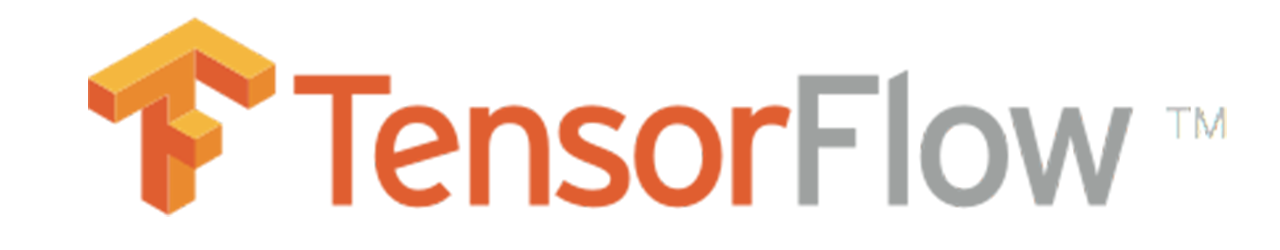

In [13]:
from IPython.display import Image
Image("assets_images/img/tensorflow.jpg",width="800")

<h1><center>Les bases de TensorFlow</center></h1>

## La top cell

In [0]:
%reset -f

import numpy as np
import os
import tensorflow as tf
tf.reset_default_graph()

import matplotlib.pyplot as plt
plt.style.use("default")

np.set_printoptions(linewidth=500,precision=2,suppress=True)

## Un peu de publicité

Par Aurélien Géron.

TensorFlow is a powerful open source software library for numerical computation, particularly well suited and fine-tuned for large-scale Machine Learning. Its basic principle is simple: you first define in Python a graph of computations to perform (for example, the one in Figure 9-1), and then TensorFlow takes that graph and runs it efficiently using optimized C++ code. Most importantly, it is possible to break up the graph into several chunks and run them in parallel across multiple CPUs or GPUs. TensorFlow also supports distributed computing, so you can train colossal neural networks on humongous training sets in a reasonable amount of time by splitting the computations across hundreds of servers. TensorFlow can train a network with millions of parameters on a training set composed of billions of instances with millions of features each. This should come as no surprise, since TensorFlow was developed by the Google Brain team and it powers many of Google’s large-scale services, such as Google Cloud Speech, Google Photos, and Google Search.

When TensorFlow was open-sourced in November 2015, there were already many popular open source libraries for Deep Learning:

Caffe
Deeplearning4j
H2O
Theano
Torch
To be fair most of TensorFlow’s features already existed in one library or another. Nevertheless, TensorFlow’s clean design, scalability, flexibility and great documentation (not to mention Google’s name) quickly boosted it to the top of the list. In short, TensorFlow was designed to be flexible, scalable, and production-ready, and existing frameworks arguably hit only two out of the three of these.

Fun short vidéo

In [8]:
%%HTML
<div align="center"><iframe width="560" height="315" src="https://www.youtube.com/embed/mWl45NkFBOc"></iframe></div>

## Le graphe des calculs

Tensorflow crée d’abord un graphe de calcul avec les opérations comme nœuds du graphe et tenseurs sur ses arêtes, puis l’exécution se produit lorsque le graphe s’exécute dans une session. C'est ce qu'on appelle communément un modèle de programmation de flux de données spécialement pour l'informatique parallèle.

### Calcul classique
Par exemple en python normal le code suivant affichera 50.

In [9]:
""" programmation classique: les opérations sont effectuées au fur et à mesure"""
x = 5
y = 5 * x
z = x * x
res = y + z
print("résultat avec calcul classique:",res)

résultat avec calcul classique: 50


### Calcul formel

Refaisons la même chose en tensorflow

In [10]:
"""refaisons la même chose en tensorflow"""
x = tf.constant(5)# -> un entier
"""comme x est un tenseur, y,z,et res seront aussi des tenseurs"""
y = 5 * x
z = x * x
res = y + z
print(res)

Tensor("add:0", shape=(), dtype=int32)


Le code affichera ```Tensor("add_3:0", shape=(), dtype=int32)``` vers la sortie. En effet, nous n’avons pas encore exécuté le graphique de calcul dans une session. Tensorflow n’a donc créé que le graphique.

Pour exécuter ce graphique, nous créons une session Tensorflow et exécutons cette session avec x = 5 en entrée.

In [11]:
##### GRAPH #####
x = tf.constant(5)
y = 5 * x
z = x * x
res = y + z
##### SESSION #####
with tf.Session() as sess:
    print("résultat avec calcul en graphe:", sess.run(res))

résultat avec calcul en graphe: 50


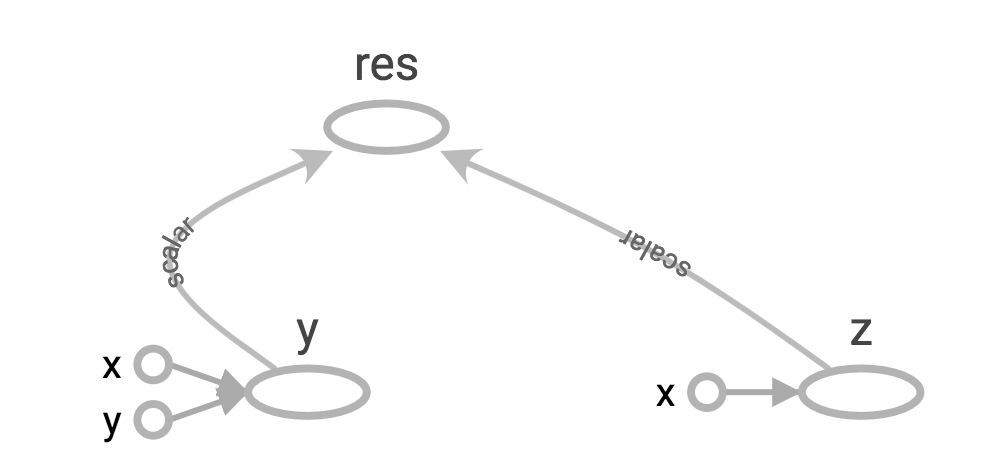

In [14]:
Image("assets_images/img/graph.png",width="800")

<h3><center>Graphique généré par Tensorboard</center></h3>

### Variables

Précédemment ```tf.constant()``` créé des tenseurs non-modifiables. Par contre, si on souhaite pouvoir modifier la valeur d’un Tensor, on le définit avec ```tf.Variable()```. Les Variables au sens de TensorFlow sont utiles quand on souhaite maintenir l’état d’une variable durant une première exécution puis le modifier pour de prochaines exécutions. Voici comment créer des variables.

In [15]:
""" une variable scalaire qui sera initialisée à 0 (entier)"""
x = tf.Variable(initial_value=0,name="x")    

"""y est une fonction de x """
y = x**2


with tf.Session() as sess:
    """les variables doivent être initialisée """
    sess.run(tf.global_variables_initializer())
    for i in range(1,4):
        """changez i par i/2. Que se passe-t-il"""
        sess.run(x.assign(i))
        print("x:", sess.run(x))
        """remarquez que y change!"""
        print("y:", sess.run(y))

x: 1
y: 1
x: 2
y: 4
x: 3
y: 9


Cela prouve que tensorFlow est un langage de calcul formel. Il mémorise les liens entre les tenseurs.

**A vous**:  (1♡) . Dans un langage informatique non formel (ex: python), que donnerait :
```
x=0
 y=x**2
 for i in range(1,4):
        x=i
        print("x",x)
        print("y=x^2",y)
 ```
        
        
Dans un langage informatique non formel comme python le y est évaluer avant la boucle du coup sa valeur reste inchangé.

```
x 1
y=x^2 0
x 2
y=x^2 0
x 3
y=x^2 0
```

### Placeholder

```tf.placeholder()``` permet de définir un placeholder. C’est simplement une Variable dont la valeur sera spécifiée plus tard lors du run d’un calcul. Le but de ces "espaces réservés" est de pouvoir définir une série d’opérations plus ou moins complexes. Puis d’alimenter ces placeholders plus tard lors du lancement de la Session grâce au "feed dictionary" nommé ```feed_dict```.

Je noterais les placeholder avec un underscore après (notamment parce que parfois cela crée un bug si on met l'underscore avant, car le nom des placehoder servent de clef de dictionnaire).

Lorsqu'on déclare un placeholder, on n'est pas obligé de le dimensionner précisément: Ainsi ```shape=[None,2] ```signifie que l'entrée x aura deux colonnes et un nombre indéterminé de lignes (en numpy on écrirait ```shape=[-1,2])```.

In [16]:
""" une matrice dont on ne connait pas le nombre de ligne """
x_ = tf.placeholder(tf.float32,shape=[None,2])
""" une constante : shape=[] car tenseur d'ordre 0 """
const_ = tf.placeholder(tf.float32,shape=[])
_x2 = const_ * x_  
_W = tf.constant([[1., 2], [3, 4]])
_y = _x2 @ _W

with tf.Session() as sess:
    x_data = [[0., 1],[2,4],[0,0]]
    print("jeu de donnée 1:\n",sess.run(_y, feed_dict={x_: x_data,const_:1}))
    x_data = [[1., 1], [2, 4]]
    print("jeu de donnée 2:\n",sess.run(_y, feed_dict={x_: x_data,const_:2}))

jeu de donnée 1:
 [[ 3.  4.]
 [14. 20.]
 [ 0.  0.]]
jeu de donnée 2:
 [[ 8. 12.]
 [28. 40.]]


Quand on oublie de remplir un placeholder, on a un message d'erreur:

In [18]:
try:
    x_ = tf.placeholder(tf.float32,shape=[None,2],name="x")
    _y = x_ ** 2
    with tf.Session() as sess:
        sess.run(_y)
except Exception as e:
    print(e.message)

You must feed a value for placeholder tensor 'x_2' with dtype float and shape [?,2]
	 [[node x_2 (defined at <ipython-input-18-1a37e3328624>:2) ]]


**A vous:** Pourquoi  (2♡)  la ligne2 ci-dessous produit une erreur et pas la ligne1? Corrigez.

In [19]:
try:
    x_ = tf.placeholder(tf.float32,shape=[None,2],name="x")
    const_ = tf.placeholder(tf.float32,shape=[],name="const")
    _y = x_ * 3
    _z = x_ * const_

    with tf.Session() as sess:
        x_data = [[0., 1], [2, 4], [0, 0]]
        print("ligne 1:\n",sess.run(_y, feed_dict={x_: x_data})) #ligne 1
        print("ligne 2:\n",sess.run(_z, feed_dict={x_: x_data})) #ligne 2
except Exception as e:
    print(e.message) 

ligne 1:
 [[ 0.  3.]
 [ 6. 12.]
 [ 0.  0.]]
You must feed a value for placeholder tensor 'const_3' with dtype float
	 [[node const_3 (defined at <ipython-input-19-bc2f866cc7be>:3) ]]


La ligne2 produit une erreur car ```_z``` est le produit de deux placeholder alors que nous n'avons alimenter que l'un des placeholders sur la partie Session.

Correction proposer:

In [20]:
try:
    x_ = tf.placeholder(tf.float32,shape=[None,2],name="x")
    const_ = tf.placeholder(tf.float32,shape=[],name="const")
    _y = x_ * 3
    _z = x_ * const_

    with tf.Session() as sess:
        x_data = [[0., 1], [2, 4], [0, 0]]
        print("ligne 1:\n",sess.run(_y, feed_dict={x_: x_data})) #ligne 1
        print("ligne 2:\n",sess.run(_z, feed_dict={x_: x_data, const_: 1})) #ligne 2
except Exception as e:
    print(e.message) 

ligne 1:
 [[ 0.  3.]
 [ 6. 12.]
 [ 0.  0.]]
ligne 2:
 [[0. 1.]
 [2. 4.]
 [0. 0.]]


## Organisation du code et performances

### A chaque run on recommence

**A vous:** Observez le code ci-dessous, et expliquez la sortie  (1♡) .

In [23]:
_x = tf.random_normal(shape=[1])

with tf.Session() as sess:
    x0 = sess.run(_x)
    x1 = sess.run(_x)
    print("deux runs:\n",x0,x1)
    x0,x1 = sess.run([_x,_x]) #un seul appel de run => une seule évaluation des tenseurs
    print("un seul run:\n",x0,x1)


deux runs:
 [0.31] [0.89]
un seul run:
 [3.1] [3.1]


Attention : à chaque appel de ```sess.run(_x)```, TOUT le graphe des calculs menant à ```_x``` est réévalué raison pour laquelle x0 est different de x1. Par contre, avec ```sess.run([_x,_y])``` tensorflow calculera une seule fois les deux tenseurs, et choisira lui même l'ordre dans lesquel il les calculera, en parallélisant si nécessaire.

## Séparation graph & run

Ainsi, lorsque l'on a de long calcul, il faut évitez les multiples ```sess.run()```. Typiquement, la structure d'un programme tensorflow est la suivante:

In [0]:
""" première partie: construction du graph"""
_a=tf.constant(2.,shape=[3,3])
_power=tf.Variable(0.)
_b=_a**_power
_c=4*_b+2.     

In [25]:
%%time
"""seconde partie: session de calcul"""
with tf.Session() as sess:
    """ initialisation des variables"""
    sess.run(tf.global_variables_initializer())
    """le graph des calculs est parcouru pleins de fois (mais c'est nécessaire):"""
    for i in range(200):
        _assignation=_power.assign(i+_power)
        "un seul run pour toutes les opérations"
        _,b,c,power=sess.run([_assignation,_b,_c,_power])
        if i<3:
          print("étape:",i,", power:",power)
          print(b,"\n",c)          

étape: 0 , power: 0.0
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]] 
 [[6. 6. 6.]
 [6. 6. 6.]
 [6. 6. 6.]]
étape: 1 , power: 1.0
[[2. 2. 2.]
 [2. 2. 2.]
 [2. 2. 2.]] 
 [[10. 10. 10.]
 [10. 10. 10.]
 [10. 10. 10.]]
étape: 2 , power: 3.0
[[8. 8. 8.]
 [8. 8. 8.]
 [8. 8. 8.]] 
 [[34. 34. 34.]
 [34. 34. 34.]
 [34. 34. 34.]]
CPU times: user 3.98 s, sys: 62.5 ms, total: 4.04 s
Wall time: 4.06 s


Remarquez que d'un run à l'autre, les variables gardent leur valeur précédente. Par contre il faut penser à les initialiser à chaque démarrage de session.

**A vous:** Dans le programme précédent, dans quel ordre  (1♡)  se font les 4 opérations _assignation,_b,_c,_power? Il est logique de faire l'assignation en premier. Du coup, faut-il faire  (1♡) :

```
sess.run(_assignation)
b=sess.run(_b)
c=sess.run(_c)
power=sess.run(_power)
```
ou bien

```
sess.run(_assignation)
b,c,power=sess.run([_b,_c,_power])
```

L'ordre est aléatoire tensorflow calculera une seule fois les tenseurs, et choisira lui même l'ordre dans lesquel il les calculera, en parallélisant si nécessaire.

Pour que le code marche bien il faut faire:

In [26]:
%%time
"""seconde partie: session de calcul"""
with tf.Session() as sess:
    """ initialisation des variables"""
    sess.run(tf.global_variables_initializer())
    """le graph des calculs est parcouru pleins de fois (mais c'est nécessaire):"""
    for i in range(200):
        _assignation=_power.assign(i+_power)
        sess.run(_assignation)
        b,c,power=sess.run([_b,_c,_power])
        if i<3:
          print("étape:",i,", power:",power)
          print(b,"\n",c)          

étape: 0 , power: 0.0
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]] 
 [[6. 6. 6.]
 [6. 6. 6.]
 [6. 6. 6.]]
étape: 1 , power: 1.0
[[2. 2. 2.]
 [2. 2. 2.]
 [2. 2. 2.]] 
 [[10. 10. 10.]
 [10. 10. 10.]
 [10. 10. 10.]]
étape: 2 , power: 3.0
[[8. 8. 8.]
 [8. 8. 8.]
 [8. 8. 8.]] 
 [[34. 34. 34.]
 [34. 34. 34.]
 [34. 34. 34.]]
CPU times: user 11 s, sys: 31.6 ms, total: 11 s
Wall time: 11 s


## Ne pas modifier le graph des calculs dans une boucle

La modification du graphe est une opération couteuse: il faut éviter d'ajouter des bouts de graphes dans des boucles en plein milieu d'une session de calcul. Cela déteriore les performances.

Et a ce propos, notre programme précédent n'est pas optimal car l'opération assignation est redéclarée plein de fois dans une boucle: on y était contraint puisque cette assignation dépendait de l'indice de la boucle.

La solution est d'utiliser les placeholder qui servent justement à recevoir des entrées.

In [0]:
""" première partie: construction du graph"""
_a=tf.constant(2.,shape=[3,3])
_power=tf.Variable(0.)
_b=_a**_power
_c=4*_b+2.
i_=tf.placeholder(tf.float32,shape=[])
_assignation=_power.assign(i_+_power)

In [28]:
%%time
"""seconde partie: session de calcul"""
with tf.Session() as sess:

  sess.run(tf.global_variables_initializer())

  for i in range(200):
      "l'assignation est faite via un dico"
      assignation,b,c,power=sess.run([_assignation,_b,_c,_power],feed_dict={i_:i})
      if i<3:
        print("étape:",i,", power:",power)
        print(b,"\n",c)

étape: 0 , power: 0.0
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]] 
 [[6. 6. 6.]
 [6. 6. 6.]
 [6. 6. 6.]]
étape: 1 , power: 1.0
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]] 
 [[6. 6. 6.]
 [6. 6. 6.]
 [6. 6. 6.]]
étape: 2 , power: 3.0
[[2. 2. 2.]
 [2. 2. 2.]
 [2. 2. 2.]] 
 [[10. 10. 10.]
 [10. 10. 10.]
 [10. 10. 10.]]
CPU times: user 231 ms, sys: 12.7 ms, total: 244 ms
Wall time: 228 ms


## GPU/CPU

On va faire maintenant des gros calculs. Evaluez mathématiquement  (2♡)  le nombre d'opérations effectués dans ces programmes.

In [0]:
size=5000

In [0]:
""" première partie: construction du graph"""
_a = tf.constant(2., shape=[size, size])
_power = tf.Variable(0.)
_b = _a ** _power
_c = 4 * _b + 2.
i_ = tf.placeholder(tf.float32, shape=[])
_assignation = _power.assign(i_ +  _power)

In [31]:
%%time
"""seconde partie: session de calcul"""
with tf.Session() as sess:

  sess.run(tf.global_variables_initializer())

  for i in range(10):
      "l'assignation est faite via un dico"
      assignation,b,c,power = sess.run([_assignation, _b, _c, _power], feed_dict={i_:i})
      if i<3:
        print("étape:",i,", power:",power)
        print(b,"\n",c)

étape: 0 , power: 0.0
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]] 
 [[6. 6. 6. ... 6. 6. 6.]
 [6. 6. 6. ... 6. 6. 6.]
 [6. 6. 6. ... 6. 6. 6.]
 ...
 [6. 6. 6. ... 6. 6. 6.]
 [6. 6. 6. ... 6. 6. 6.]
 [6. 6. 6. ... 6. 6. 6.]]
étape: 1 , power: 1.0
[[2. 2. 2. ... 2. 2. 2.]
 [2. 2. 2. ... 2. 2. 2.]
 [2. 2. 2. ... 2. 2. 2.]
 ...
 [2. 2. 2. ... 2. 2. 2.]
 [2. 2. 2. ... 2. 2. 2.]
 [2. 2. 2. ... 2. 2. 2.]] 
 [[10. 10. 10. ... 10. 10. 10.]
 [10. 10. 10. ... 10. 10. 10.]
 [10. 10. 10. ... 10. 10. 10.]
 ...
 [10. 10. 10. ... 10. 10. 10.]
 [10. 10. 10. ... 10. 10. 10.]
 [10. 10. 10. ... 10. 10. 10.]]
étape: 2 , power: 3.0
[[8. 8. 8. ... 8. 8. 8.]
 [8. 8. 8. ... 8. 8. 8.]
 [8. 8. 8. ... 8. 8. 8.]
 ...
 [8. 8. 8. ... 8. 8. 8.]
 [8. 8. 8. ... 8. 8. 8.]
 [8. 8. 8. ... 8. 8. 8.]] 
 [[34. 34. 34. ... 34. 34. 34.]
 [34. 34. 34. ... 34. 34. 34.]
 [34. 34. 34. ... 34. 34. 34.]
 ...
 [34. 34. 34. 

- Observez le temps en CPU
- Maintenant allez dans le menu Exécution>Modifiez le type d'exécution et choisissez l'accélération GPU. Observez le temps en GPU


## Partager sa mémoire  ♭

Maintenant on modifie un peu le code pour préciser sur quel GPU on met notre graphe de calcul: On pourrait éventuellement utiliser plusieurs GPU pour des parties séparée du graph. De plus, on définit une config:
```
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config=config, ...)
```
L'option allow_growth fait que tensorflow utilise le minimum de mémoire GPU possible lors de la session de calcul. Il commence par allouer une très petite place mémoire, puis il étend cette place au fur à mesure des besoins.

En fait sur collab, cela n'a pas beaucoup d'importance, mais pensez-y si vous devez travailler sur des serveurs partagés. Une autre technique plus rigide est de faire:

```
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.4
session = tf.Session(config=config, ...)
```
Dans ce cas, on utilisera 40% de la mémoire.

In [0]:
# See https://www.tensorflow.org/tutorials/using_gpu#allowing_gpu_memory_growth
config = tf.ConfigProto()
config.gpu_options.allow_growth = True

with tf.device('/gpu:0'):
  """construction du graph des calculs"""
  _a=tf.constant(2.,shape=[size,size])
  _power=tf.Variable(0.)
  _b=_a**_power
  _c=4*_b+2.
  i_=tf.placeholder(tf.float32,shape=[])
  _assignation=_power.assign(i_+_power)

In [6]:
%%time
"""seconde partie: session de calcul"""
with tf.Session(config=config) as sess:

  sess.run(tf.global_variables_initializer())

  for i in range(10):
      "l'assignation est faite via un dico"
      assignation,b,c,power=sess.run([_assignation,_b,_c,_power],feed_dict={i_:i})
      if i<3:
        print("étape:",i,", power:",power)
        print(b,"\n",c)

étape: 0 , power: 0.0
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]] 
 [[6. 6. 6. ... 6. 6. 6.]
 [6. 6. 6. ... 6. 6. 6.]
 [6. 6. 6. ... 6. 6. 6.]
 ...
 [6. 6. 6. ... 6. 6. 6.]
 [6. 6. 6. ... 6. 6. 6.]
 [6. 6. 6. ... 6. 6. 6.]]
étape: 1 , power: 1.0
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]] 
 [[6. 6. 6. ... 6. 6. 6.]
 [6. 6. 6. ... 6. 6. 6.]
 [6. 6. 6. ... 6. 6. 6.]
 ...
 [6. 6. 6. ... 6. 6. 6.]
 [6. 6. 6. ... 6. 6. 6.]
 [6. 6. 6. ... 6. 6. 6.]]
étape: 2 , power: 1.0
[[2. 2. 2. ... 2. 2. 2.]
 [2. 2. 2. ... 2. 2. 2.]
 [2. 2. 2. ... 2. 2. 2.]
 ...
 [2. 2. 2. ... 2. 2. 2.]
 [2. 2. 2. ... 2. 2. 2.]
 [2. 2. 2. ... 2. 2. 2.]] 
 [[10. 10. 10. ... 10. 10. 10.]
 [10. 10. 10. ... 10. 10. 10.]
 [10. 10. 10. ... 10. 10. 10.]
 ...
 [10. 10. 10. ... 10. 10. 10.]
 [10. 10. 10. ... 1

## Calcul tensoriel  ↩

La syntaxe tensorflow est trés proche de numpy. Attention quand même aux différences, par exemple: np.sum et tf.reduce_sum.

### Data-type

Attention, par défaut tensorflow travaille en 32 bits: float32, int32.

Si on print un tenseur sans faire appel à sess.run, on n'obtient pas de valeur (puisqu'il en a pas encore), mais on obtient:

- son name
- sa shape-déclarée
- son dtype (data-type)

In [7]:
x = tf.constant([5,5],name="x") # par défaut en int 32
y = tf.constant([5.,5],name="y") # par défaut en float 32 (quelle est la différence avec la ligne d'avant ?)
z = tf.constant([5,5.5],dtype=tf.float64,name="z") # pour travailler en double précision
t = tf.cast(z,tf.int32,name="t")


print("x, sans run:",x)
print("y, sans run:",y)
print("z, sans run:",z)
print("t, sans run:",t)

with tf.Session() as sess:
    print ('x:',sess.run(x))
    print('y:',sess.run(y))
    print('z:', sess.run(z))
    print('t:', sess.run(t))

x, sans run: Tensor("x:0", shape=(2,), dtype=int32)
y, sans run: Tensor("y:0", shape=(2,), dtype=float32)
z, sans run: Tensor("z:0", shape=(2,), dtype=float64)
t, sans run: Tensor("t:0", shape=(2,), dtype=int32)
x: [5 5]
y: [5. 5.]
z: [5.  5.5]
t: [5 5]


### opération élémentaire sur un tenseur

In [8]:
tensor1 = tf.constant(1, shape=[3, 2])
tensor2 = tf.transpose(tensor1)

"""on fait la somme selon l'indice 0 (i)  :
       = sum_i tensor1[i,j]  """
tensor3 = tf.reduce_sum(tensor1, axis=0)

tensor4 = tensor1 * 3
tensor5 = tensor1 + tensor1

with tf.Session() as sess:
    print("tensor1:\n",sess.run(tensor1))
    print("tensor2:\n",sess.run(tensor2 ))
    print("tensor3:\n",sess.run(tensor3 ))
    print("tensor4:\n",sess.run(tensor4 ))
    print("tensor5:\n",sess.run(tensor5 ))

tensor1:
 [[1 1]
 [1 1]
 [1 1]]
tensor2:
 [[1 1 1]
 [1 1 1]]
tensor3:
 [3 3]
tensor4:
 [[3 3]
 [3 3]
 [3 3]]
tensor5:
 [[2 2]
 [2 2]
 [2 2]]


**A vous:** Vérifiez  (1♡)  que toutes ces opérations n'ont pas affecté le tensor1.

In [9]:
with tf.Session() as sess:
    print("tensor1:\n",sess.run(tensor1))
    print("tensor2:\n",sess.run(tensor2 ))
    print("tensor3:\n",sess.run(tensor3 ))
    print("tensor4:\n",sess.run(tensor4 ))
    print("tensor5:\n",sess.run(tensor5 ))
    print("tensor1:\n",sess.run(tensor1))

tensor1:
 [[1 1]
 [1 1]
 [1 1]]
tensor2:
 [[1 1 1]
 [1 1 1]]
tensor3:
 [3 3]
tensor4:
 [[3 3]
 [3 3]
 [3 3]]
tensor5:
 [[2 2]
 [2 2]
 [2 2]]
tensor1:
 [[1 1]
 [1 1]
 [1 1]]


**A vous:** Essayer de combiner (ex additionner) deux tenseurs de types différents. Reportez  (1♡)  la partie "instructive du message d'erreur" produit.

In [0]:
tensor6 = tf.constant(1, shape=[3, 2])
tensor7 = tf.constant(1., shape=[3, 2])

tensor8 = tensor6 + tensor7

with tf.Session() as sess:
    print(sess.run(tensor8))

TypeError: Input 'y' of 'Add' Op has type float32 that does not match type int32 of argument 'x'.

## Broadcasting  ♭

ou comment utiliser des dimensions supplémentaires pour faire des boucles implicites. Attention: l'extension de dimension est difficile au début. Conseil : toujours écrire les indices comme dans les commentaires ci-dessous.

In [11]:
size = 3
data = [i for i in range(size)]


"""deux vecteurs 'lignes' """
tensor1 = tf.constant(data)
tensor2 = tf.constant(data)
"""tensor1Exp[ij]=tensor1[j] """
tensor1Exp = tensor1[tf.newaxis,:]
"variante"
#tensor1Exp=tf.expand_dims(tensor1,0) 
"""tensor2Exp[ij]=tensor2[i] """
tensor2Exp = tensor2[:,tf.newaxis]
"""
tensor3[ij]= tensor1Exp[ij] + tensor2Exp[ij]
          = tensor1[j]     + tensor2[i]
"""
tensor3 = tensor1Exp + tensor2Exp


"""on peut additionner,multiplier, soustraire,  des tenseurs de dimensions différentes.
Par défaut tf (comme np) fait des expand_dims(,0). Cette extension automatique s'appelle le broadcast.
Remarquons qu'en math, on fait naturellement des extensions, par exemple quand on effectue:
 Sum_i (a[i] - b )^2
 V[i]= Sum_i (a[ij] - b[i] )^2
 M[i,j]=a[i]+b[j]
 """
tensor4 = tf.constant([[1.,2,3], [4,5,6]])
tensor5 = tf.constant([10.,10,10])
tensor6 = tf.constant(100.)
tensor7 = tensor4 + tensor5
tensor8 = tensor6 + tensor7

with tf.Session() as sess:
    print("tensor1:\n", sess.run(tensor1 ))
    print("tensor2:\n", sess.run(tensor2 ))
    print("tensor1Exp:\n", sess.run(tensor1Exp ))
    print("tensor2Exp:\n", sess.run(tensor2Exp ))
    print("tf.shape(tensor1):\n", sess.run(tf.shape(tensor1) ))
    print("tf.shape(tensor1Exp):\n", sess.run(tf.shape(tensor1Exp) ))
    print("tensor3:\n", sess.run(tensor3 ))
    print("tensor7:\n", sess.run(tensor7))
    print("tensor8:\n", sess.run(tensor8) )

tensor1:
 [0 1 2]
tensor2:
 [0 1 2]
tensor1Exp:
 [[0 1 2]]
tensor2Exp:
 [[0]
 [1]
 [2]]
tf.shape(tensor1):
 [3]
tf.shape(tensor1Exp):
 [1 3]
tensor3:
 [[0 1 2]
 [1 2 3]
 [2 3 4]]
tensor7:
 [[11. 12. 13.]
 [14. 15. 16.]]
tensor8:
 [[111. 112. 113.]
 [114. 115. 116.]]


**A vous:**  (1♡)  Si tensor0.shape=(3,2), quelle est la shape de:

tensor0[tf.newaxis,:,tf.newaxis,:] 

In [0]:
tensor0 = tf.constant([[1,1], [1,1], [1,1]])
t = tensor0[tf.newaxis,:,tf.newaxis,:]
t1 = tensor0[tf.newaxis,:]
with tf.Session() as sess:
    print(sess.run(t1))
    print(sess.run(tf.shape(t1)))
    print(sess.run(tf.shape(tensor0)))

[[[1 1]
  [1 1]
  [1 1]]]
[1 3 2]
[3 2]


### Coller des tenseurs

In [12]:
tensor1=tf.constant([1.,2,3])
tensor2=tf.constant([0.,7,1])

tensor3=tf.stack([tensor1,tensor2],axis=0)
tensor4=tf.stack([tensor1,tensor2],axis=1)
with tf.Session() as sess:
    print("tensor1:\n", sess.run(tensor1))
    print("tensor2:\n", sess.run(tensor2))
    print("tensor3:\n", sess.run(tensor3))
    print("tensor4:\n", sess.run(tensor4))

tensor1:
 [1. 2. 3.]
tensor2:
 [0. 7. 1.]
tensor3:
 [[1. 2. 3.]
 [0. 7. 1.]]
tensor4:
 [[1. 0.]
 [2. 7.]
 [3. 1.]]


In [13]:
tensor1=tf.constant([[1.,2,3]])
tensor2=tf.constant([[0.,7,1]])

tensor3=tf.concat([tensor1,tensor2],axis=0)
tensor4=tf.concat([tensor1,tensor2],axis=1)
with tf.Session() as sess:
    print("tensor1:\n", sess.run(tensor1))
    print("tensor2:\n", sess.run(tensor2))
    print("tensor3:\n", sess.run(tensor3))
    print("tensor4:\n", sess.run(tensor4))

tensor1:
 [[1. 2. 3.]]
tensor2:
 [[0. 7. 1.]]
tensor3:
 [[1. 2. 3.]
 [0. 7. 1.]]
tensor4:
 [[1. 2. 3. 0. 7. 1.]]


**A vous:** Jouez  (1♡)  au jeu des différences entre les 2 cellules précédentes.

### Tensorflow et numpy

Numpy est très souvent utilisé pour les entrées et sorties de tensorflow.

In [14]:
"""ENTRÉES """
tensor1_np=np.zeros(shape=[3,3])
for i in range(3):
    for j in range(3):
        tensor1_np[i,j]=i+j

tensor2_np=np.zeros(shape=[3])
for i in range(3): tensor2_np[i]=i

"""pré-traitement (on remplace des zéros par des -1 parce qu'on aime pas les zéros)"""
tensor1_np[tensor1_np==0]=-1

print("tensor1_np\n",tensor1_np)


"""on transforme les np-tenseurs en tf-tenseurs  """
tensor1_tf=tf.constant(tensor1_np)
tensor2_tf=tf.constant(tensor2_np)

"""on écrit le graph des calcul"""
tensor3_tf=tf.reduce_sum(tensor1_tf*tensor2_tf,axis=0)
"""qu'obtient-on sans axis=0 ?"""


with tf.Session() as sess:
    """ SORTIE : sess.run renvoie des np-tenseurs """
    tensor3_np=sess.run(tensor3_tf)

""" POST-TRAITEMENT (ici, simple affichage)"""
print("tensor3:\n",tensor3_np)

tensor1_np
 [[-1.  1.  2.]
 [ 1.  2.  3.]
 [ 2.  3.  4.]]
tensor3:
 [ 0.  6. 18.]


## Approfondir python: le contexte manager  ♭

Le "context manager" permet de créer un objet avec le mot clef with, et de "fermer" cet objet dès que l'on sort du block with.

### Exemple typique

In [0]:
class File:

    def __init__(self, filename, mode):
        self.filename = filename
        self.mode = mode

    def __enter__(self):
        self.open_file = open(self.filename, self.mode)
        return self.open_file


    def __exit__(self, exc_type, exc_val, exc_tb):
        self.open_file.close()

In [16]:
"""on ouvre le fichier, on écrit dedans (mode=w) et on le referme"""
with File('foo.txt', 'w') as f:
    f.write('foo1')
    f.write('foo2')
    f.write('foo3')

"""on ouvre le fichier, on lit dedans (mode:r) et on le referme"""
with File('foo.txt', 'r') as f:
    for line in f:
        print(line)


"""En fait, de base il existe déjà un context manager qui ouvre et ferme un fichier : """
with open('foo.txt', 'r') as f:
    for line in f:
        print(line)

foo1foo2foo3
foo1foo2foo3


### Exemple moins bateau

Dans cet exemple, nous avons volontairement séparer le context Manager de l'objet qu'il fabrique (celui renvoyer par le mot clef "as")

In [0]:
class Homme:

    def __init__(self):
        self.personalData = []

    def addAPersonalData(self, data):
        self.personalData.append(data)

    def toutMontrer(self):
        for data in self.personalData:
            print(data)



class HommeContextManager:
    def __enter__(self):
        self.homme=Homme()
        return self.homme

    """quand l'homme meurt, on détruit toutes ces données personnelles"""
    def __exit__(self, exc_type, exc_val, exc_tb):
        for data in self.homme.personalData:
            for key in data.keys():
                data[key]=None

In [18]:
with HommeContextManager() as homme:

    data1={"banckAccount":3424563456}
    data2={"pasword":"mon petit poney"}

    homme.addAPersonalData(data1)
    homme.addAPersonalData(data2)

    homme.toutMontrer()


print("après la mort de l'homme:")
print(data1["banckAccount"])
print(data2["pasword"])

{'banckAccount': 3424563456}
{'pasword': 'mon petit poney'}
après la mort de l'homme:
None
None
